# Faculty_Note_Book-Day02

## Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. 
The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.


Attribute Information:

    1. Class Name: 3 (L, B, R) 
    2. Left-Weight: 5 (1, 2, 3, 4, 5) 
    3. Left-Distance: 5 (1, 2, 3, 4, 5) 
    4. Right-Weight: 5 (1, 2, 3, 4, 5) 
    5. Right-Distance: 5 (1, 2, 3, 4, 5)
    
    Data Set Characteristics:  Multivariate
    Attribute Characteristics: Categorical
    Number of Instances: 625
    Number of Attributes:4

## Data Understanding

## 1.1 Load the libraries:

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os


## 1.2. Import the dataset:

In [15]:
balance_data = pd.read_csv('balance-scale.data',sep= ',', header= None,names=['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])

In [16]:
balance_data.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


## 1.3. checking the length & dimensions of our dataframe, we can use len() method & “.shape”.

In [17]:
print ("Dataset Lenght:: ", len(balance_data))
print ("Dataset Shape:: ", balance_data.shape)

Dataset Lenght::  625
Dataset Shape::  (625, 5)


## 1.4 Check the Statistical description of our dataset

In [18]:
balance_data.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


## 1.5 Label Encoding the 'Class' column 

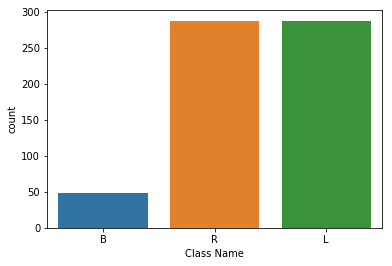

In [19]:
sns.countplot(balance_data['Class Name'])
plt.show()

In [20]:
balance_data['Class Name'].value_counts()

R    288
L    288
B     49
Name: Class Name, dtype: int64

We see here that most of the times either the scale is in left or right state. Very few cases are there in which the scale is balanced.

In [21]:
balance_data['Class Name'] = LabelEncoder().fit_transform(balance_data['Class Name'].tolist())

## 1.6  Pair plot after doing label encoding 

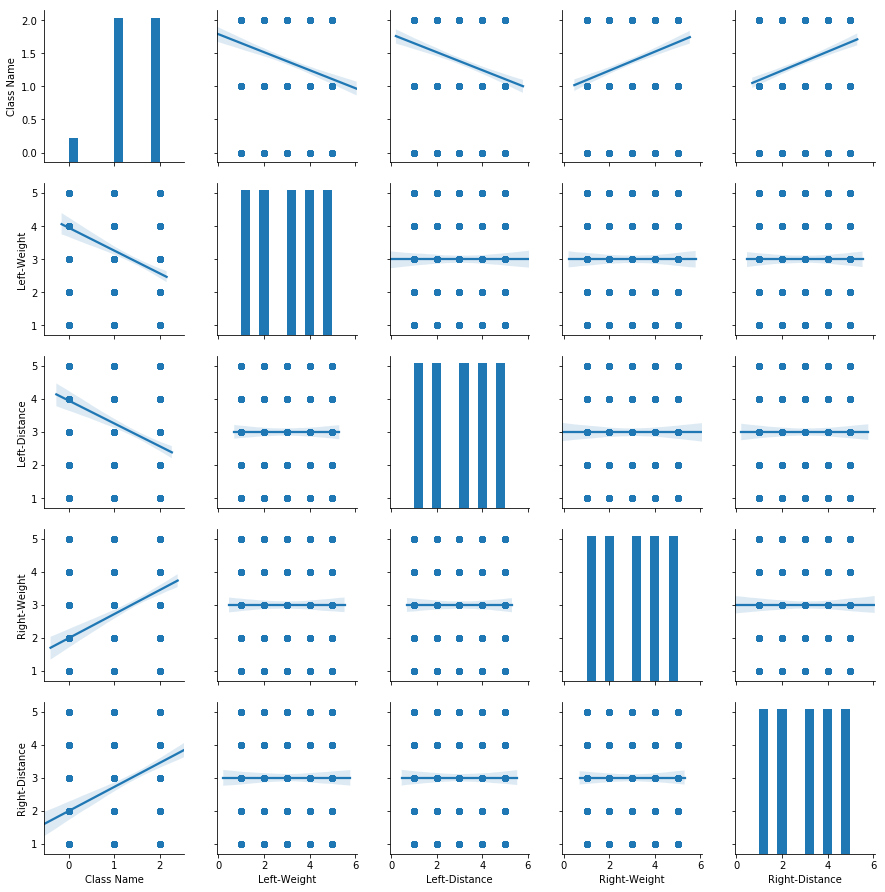

In [23]:
#pairplot
sns.pairplot(balance_data, kind="reg")
plt.show()

## 1.7 Check Heatmap

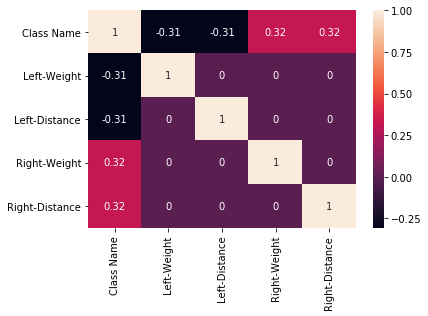

In [28]:
#Heatmap
sns.heatmap(balance_data.corr(),annot=True)
plt.show()

Conclusion : Plots show that the other attributes are equally correlated to Class.

Hence, droping other columns except for 'Class' is not required

## 1.8 We'll separate the features and target from our dataset into X and y.

X contains all of the features

y contains the target

In [29]:
X = balance_data.drop(['Class Name'], axis=1)

In [30]:
y = balance_data['Class Name']

In [31]:
print(X.shape)
print(y.shape)

(625, 4)
(625,)


## 1.9 Train Test Split:
    
Splitting the data in training set which our model will be trained on, and testing set that our model will be tested on by making predictions.


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)
print(X_train.shape)
print(X_test.shape)

(375, 4)
(250, 4)


## 1.10  Without Feature scaling

##  1.11 Check gini as criterion

In [79]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

## 1.11b) Check Predictions and Evaluation

In [81]:
giniPred = giniDecisionTree.predict(X_test)

In [82]:
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.692


## 1.11c) Check classification_report

In [36]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.63      0.87      0.73       107
           2       0.78      0.67      0.72       119

    accuracy                           0.69       250
   macro avg       0.47      0.51      0.48       250
weighted avg       0.64      0.69      0.66       250



/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 1.12 Check entropy as criterion

In [37]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)

In [38]:
entropyDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

## 1.12 b) Check Predictions and Evaluation

In [39]:
entropyPred = entropyDecisionTree.predict(X_test)

In [40]:
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.692


## 1.12 c) Check classification_report

In [41]:
print(classification_report(y_test, entropyPred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.63      0.87      0.73       107
           2       0.78      0.67      0.72       119

    accuracy                           0.69       250
   macro avg       0.47      0.51      0.48       250
weighted avg       0.64      0.69      0.66       250



/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 1.13 Check Feature scaling
    
Feature scaling is a method used to standardize the range of features. It is also known as data normalization (or standardization) and is a crucial step in data preprocessing.

##  1.14 Apply the MinMaxScaler for dataset?

In [42]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
X_train_norm = MinMax.fit_transform(X_train)
X_test_norm = MinMax.fit_transform(X_test)


Though normalization via min-max scaling is useful to keep values in a bounded interval, standardization can be more practical when we want the feature columns to have a normal distribution.

## 1.14 a) Building and Training our Decision Tree Model

## 1.14 b) gini index as criterion MinMaxScaler

In [50]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=5, min_samples_leaf=5)
giniDecisionTree.fit(X_train_norm, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

## 1.14 d) Gini Predictions and Evaluation

In [51]:
giniPred = giniDecisionTree.predict(X_test_norm)

In [52]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.764


## 1.14 e) Check the classification_report we observe Accuracy Score incresed  

In [53]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.27      0.12      0.17        24
           1       0.71      0.91      0.80       107
           2       0.88      0.76      0.82       119

    accuracy                           0.76       250
   macro avg       0.62      0.60      0.60       250
weighted avg       0.75      0.76      0.75       250



##  1.15 Entropy as criterion MinMaxScaler

In [54]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=5, min_samples_leaf=5)

entropyDecisionTree.fit(X_train_norm, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

 ## 1.15 b) Predictions and Evaluation

In [55]:
entropyPred = entropyDecisionTree.predict(X_test_norm)

In [56]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.748


## 1.5 c) Check classification_report

In [57]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.27      0.12      0.17        24
           1       0.71      0.91      0.80       107
           2       0.88      0.76      0.82       119

    accuracy                           0.76       250
   macro avg       0.62      0.60      0.60       250
weighted avg       0.75      0.76      0.75       250



##  1.16 Apply StandardScaler train and test?

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

## 1.6 a) Building and Training our Decision Tree Model after appling the StandardScaler?

## 1.16 b) gini index as criterion StandardScaler

In [60]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini')

In [61]:
giniDecisionTree.fit(X_train_scaler, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##  1.16 d) Predictions and Evaluation

In [62]:
giniPred = giniDecisionTree.predict(X_test_scaler)

In [63]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.744


##  1.16 e) Check the classification report

In [64]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.84      0.81      0.82       107
           2       0.85      0.83      0.84       119

    accuracy                           0.74       250
   macro avg       0.56      0.55      0.55       250
weighted avg       0.76      0.74      0.75       250



## 1.17 Entropy as criterion StandardScaler

In [65]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy')

In [66]:
entropyDecisionTree.fit(X_train_scaler, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##  1.17 b) Predictions and Evaluation

In [67]:
 entropyPred = entropyDecisionTree.predict(X_test_scaler)

In [68]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.756


## 1.17 c) Check the classification report for entropy?

In [69]:
print('Classification Report')
print(classification_report(y_test, entropyPred))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.84      0.82      0.83       107
           2       0.86      0.85      0.86       119

    accuracy                           0.76       250
   macro avg       0.57      0.56      0.56       250
weighted avg       0.77      0.76      0.76       250



## 1.18 Final Report

**Without Feature scaling**(random_state = 100,max_depth=3, min_samples_leaf=5)

1.**GINI Index**  Accuracy Score:  0.692

2.**Entropy**  Accuracy Score:  0.692

**With Feature MinMaxScaler** (random_state = 100,max_depth=3, min_samples_leaf=5)

1.**GINI Index**  Accuracy Score:  0.764

2.**Entropy**  Accuracy Score:  0.748

**With Feature StandardScaler** (full tree)

1.**GINI Index**  Accuracy Score:  0.748

2.**Entropy**  Accuracy Score:  0.752

# ---------------------------------------- Happy Learning --------------------------------------

In [70]:
import graphviz
from sklearn import tree